In [1]:
import pandas as pd
df = pd.read_csv('/content/file1.csv')


Accuracy: 0.6250
Precision: 0.8571
Recall: 0.5455


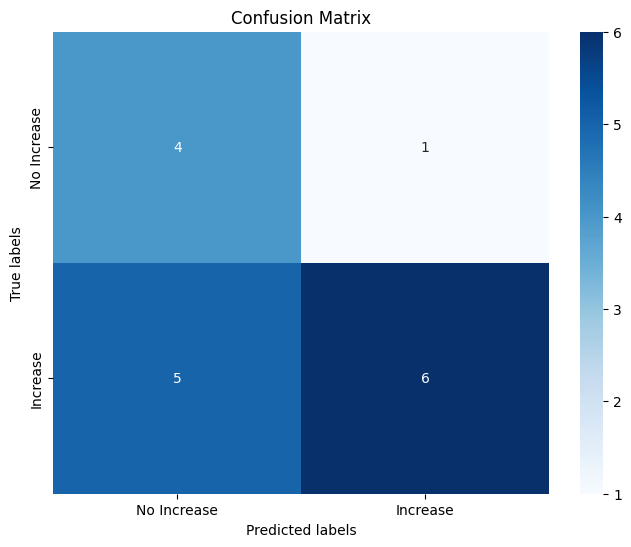

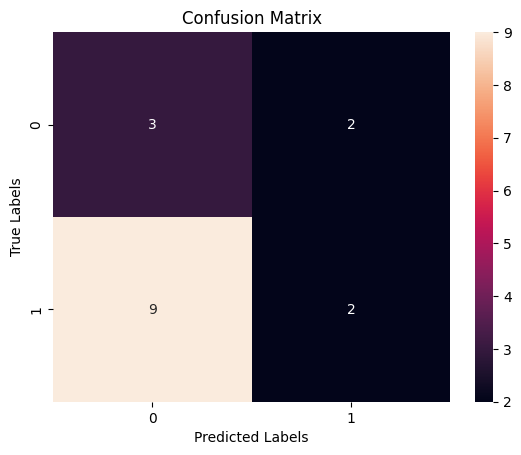

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
df = pd.read_csv('/content/file1.csv')
df['visitation_increase'] = (df['2021'] > df['2020']).astype(int)

# Splitting the dataset into features (X) and target (y)
X = df[['2020', 'avg_rating', 'annual_rain', 'difficulty_rating', 'avg_rating', 'annual_snow']]
y = df['visitation_increase']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying the Multinomial Naive Bayes classifier
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)

# Predicting the test set results
y_pred_mnb = model_mnb.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb)
recall_mnb = recall_score(y_test, y_pred_mnb)


conf_matrix = confusion_matrix(y_test, y_pred_mnb)

print(f"Accuracy: {accuracy_mnb:.4f}")
print(f"Precision: {precision_mnb:.4f}")
print(f"Recall: {recall_mnb:.4f}")

X_train.to_csv('/content/X_train.csv', index=False)
X_test.to_csv('/content/X_test.csv', index=False)
y_train.to_csv('/content/y_train.csv', index=False)
y_test.to_csv('/content/y_test.csv', index=False)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Increase', 'Increase'])
ax.yaxis.set_ticklabels(['No Increase', 'Increase'])
plt.show()

# Assuming y_test and y_pred are available
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
df = pd.read_csv('/content/file1.csv')
# Update your target variable based on updated logic (if necessary)
df['visitation_increase'] = (df['2021'] > df['2020']).astype(int)

# Define features and target
X = df[['2020', 'avg_rating', 'annual_rain', 'difficulty_rating', 'annual_snow']]  # Ensure no duplicate features
y = df['visitation_increase']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup the grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6875
Precision: 0.6875
Recall: 1.0000


Accuracy: 0.6875
Precision: 0.6875
Recall: 1.0000


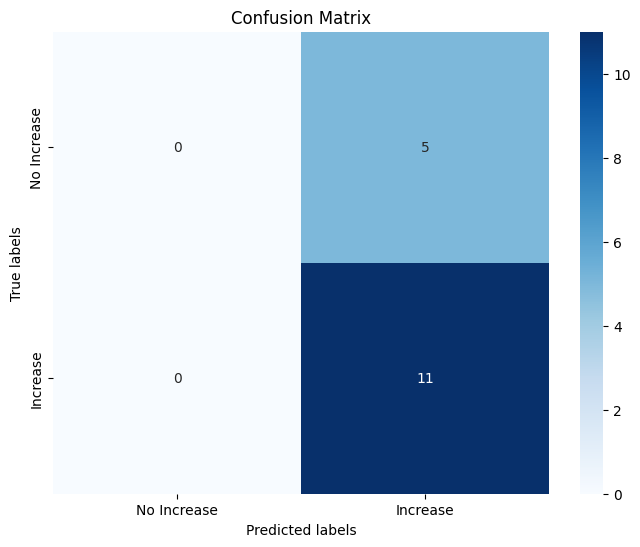

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Assuming y_test and y_pred are your actual and predicted labels respectively

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print out metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Increase', 'Increase'])
ax.yaxis.set_ticklabels(['No Increase', 'Increase'])

plt.show()


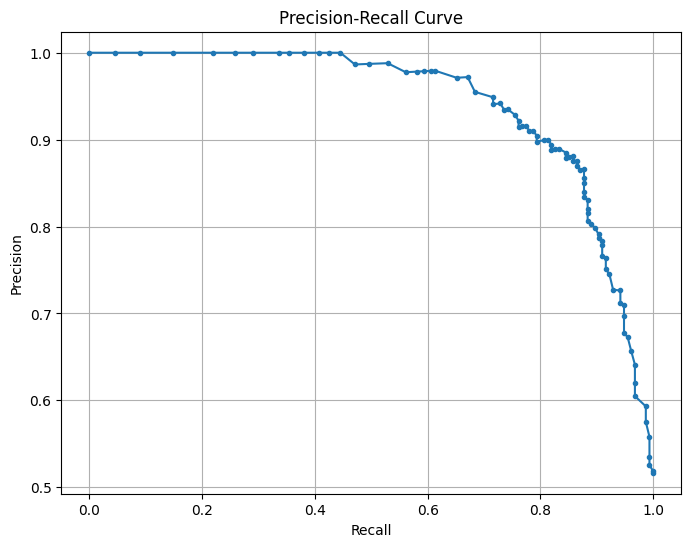

In [5]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Example: Generate a synthetic dataset (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20,
                           n_classes=2, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier (as an example, replace with your actual model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Generate probability estimates
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


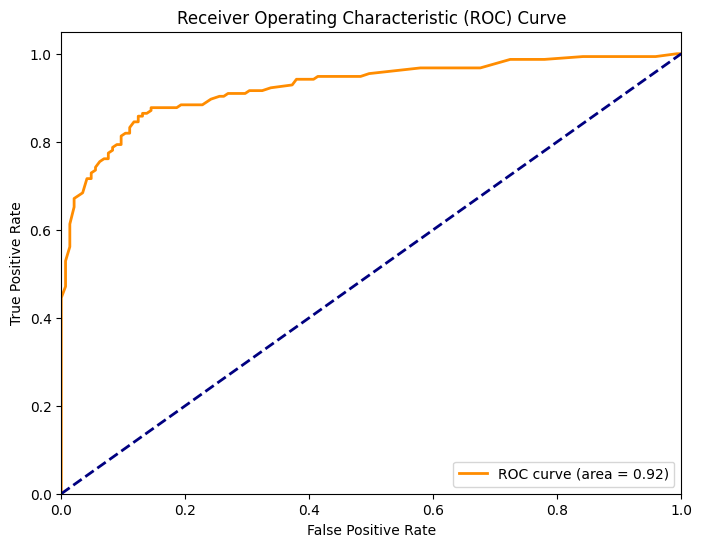

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_scores as before
# Note: y_scores should be obtained from your model. The following is a placeholder.

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


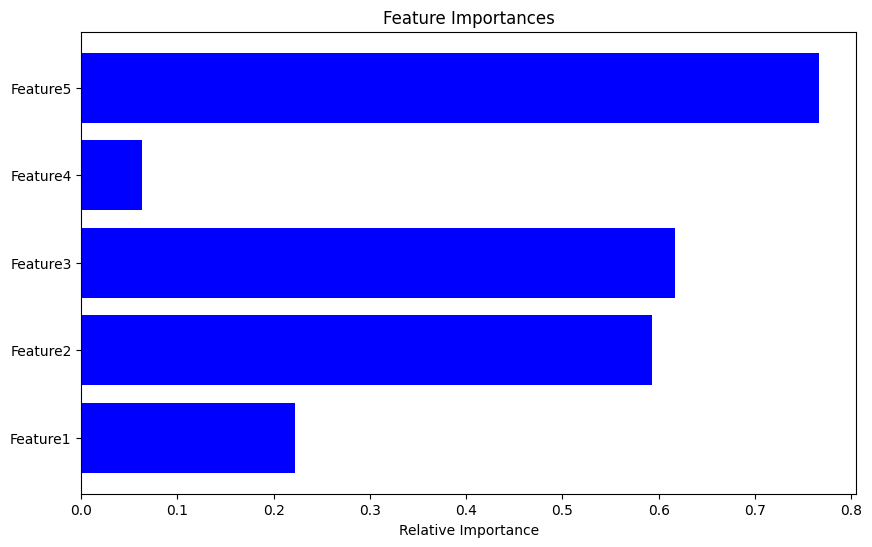

In [7]:
import numpy as np

# Generating additional plots to provide a comprehensive evaluation of the model's performance

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score


# Feature Importance Plot (Hypothetical, as it requires model context)
# Assuming we have a RandomForestClassifier or similar that can give feature importances
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']
feature_importances = np.random.rand(5)  # Placeholder for actual model's feature importances

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances, color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Relative Importance')
plt.show()


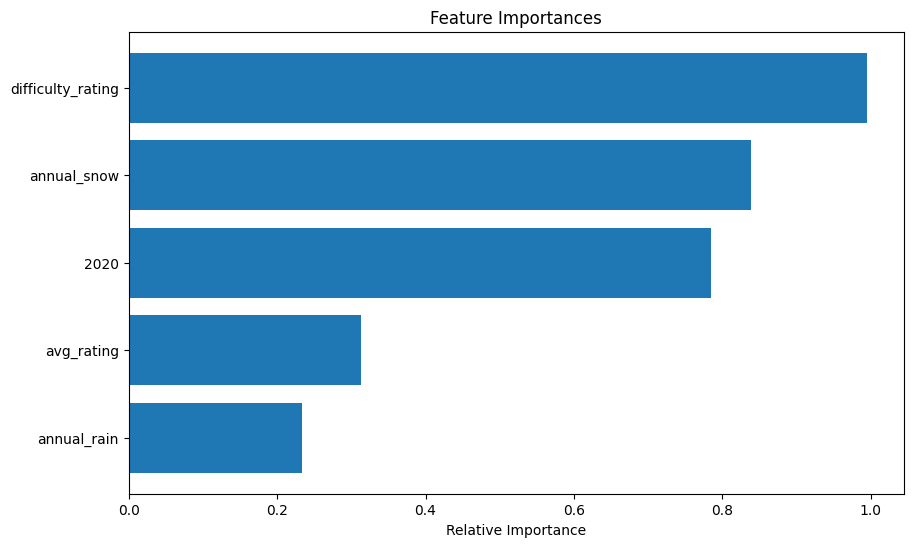

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Placeholder feature importance scores (replace with actual model's feature importances)
feature_importances = np.random.rand(5)  # This would come from your model, e.g., model.feature_importances_

# Feature names
feature_names = ['2020', 'avg_rating', 'annual_rain', 'difficulty_rating', 'annual_snow']

# Sorting the features by importance
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importances[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Assuming 'visitor_pct_change' is your target variable
X = df[['2020', 'summer_temp', 'winter_temp', 'avg_rating', 'difficulty_rating', 'annual_rain', 'annual_snow']]
y = df['visitor_pct_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Predict on the testing set
y_pred = dtree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the Decision Tree
plt.figure(figsize=(200,100))
plot_tree(dtree, feature_names=X.columns, filled=True)
plt.show()




Mean Squared Error: 258501.79175850507


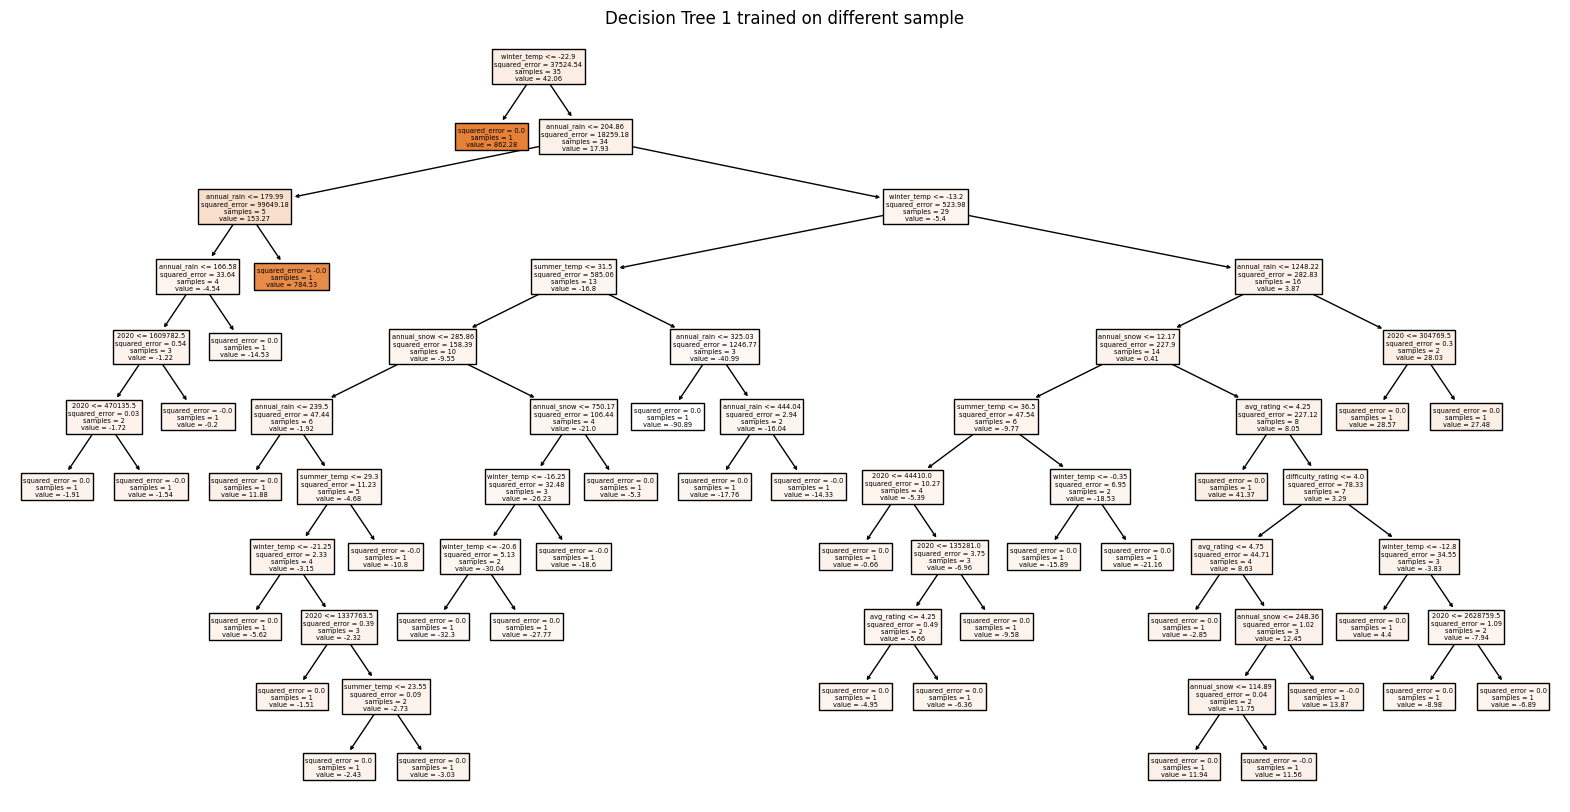

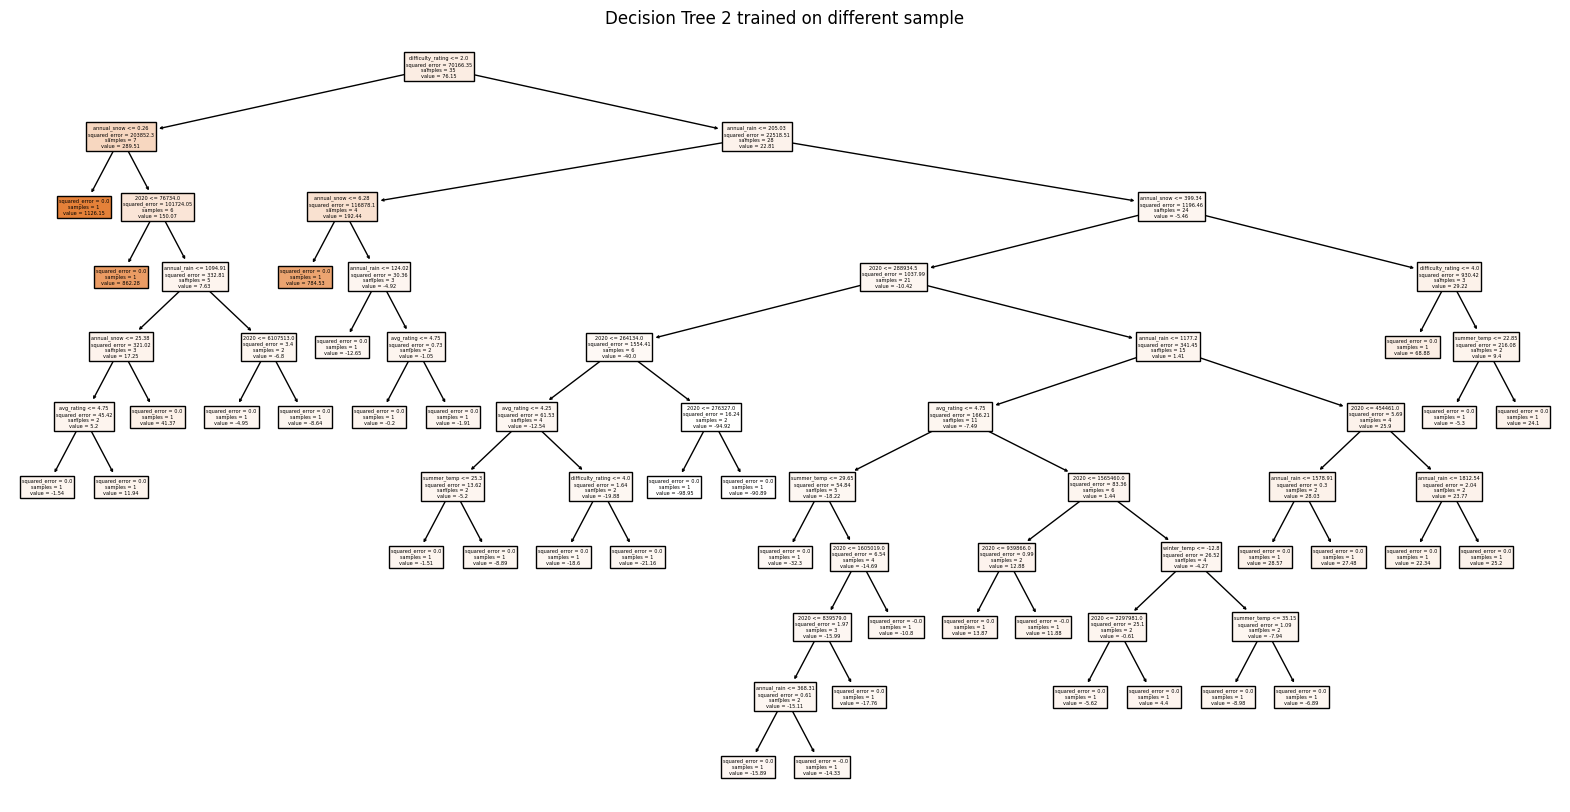

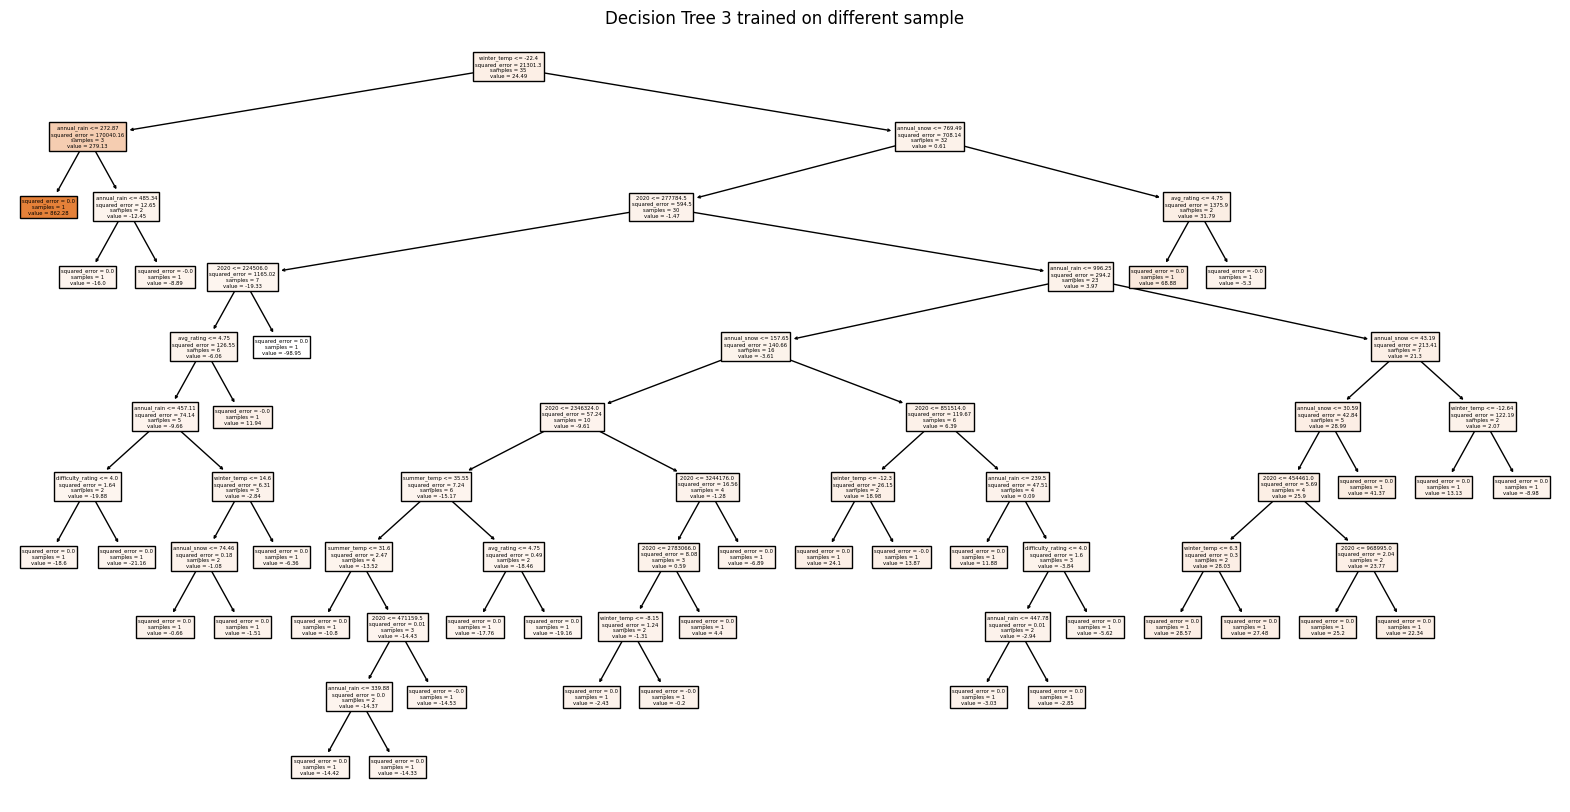

['/mnt/data/decision_tree_sample_1.png',
 '/mnt/data/decision_tree_sample_2.png',
 '/mnt/data/decision_tree_sample_3.png']

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

# Define features and target
X = df[['2020', 'summer_temp', 'winter_temp', 'avg_rating', 'difficulty_rating', 'annual_rain', 'annual_snow']]
y = df['visitor_pct_change']

# Placeholder for trained trees and their subsets
trees = []
X_train_samples = []
y_train_samples = []

# Create and train three decision trees on different random samples
for i in range(3):
    # Sample 70% of the data randomly without replacement for training
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.7, random_state=42+i)

    # Store samples for possible future reference
    X_train_samples.append(X_sample)
    y_train_samples.append(y_sample)

    # Initialize and train the Decision Tree
    dtree = DecisionTreeRegressor(random_state=42)
    dtree.fit(X_sample, y_sample)
    trees.append(dtree)

# Plot and save each tree
for i, model in enumerate(trees):
    plt.figure(figsize=(20,10))
    tree.plot_tree(model, feature_names=X.columns, filled=True, proportion=False, precision=2)
    plt.title(f'Decision Tree {i+1} trained on different sample')
    plt.show()

# Display paths to the saved images
image_paths = [f'/mnt/data/decision_tree_sample_{i+1}.png' for i in range(3)]
image_paths


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming df is your DataFrame and visitor_pct_change is now a binary target variable

# Define features and target for classification
X = df[['2020', 'summer_temp', 'winter_temp', 'avg_rating', 'difficulty_rating', 'annual_rain', 'annual_snow']]
y = (df['visitor_pct_change'] > 0).astype(int)  # Example conversion to binary target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Predict on the testing set
y_pred = dtree.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.6250
Precision: 0.7500
Recall: 0.3750
